## **PCA eg 2**

In [2]:
import pandas as pd
import numpy as py

from sklearn.preprocessing import MinMaxScaler, StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()       # cancer holds multiple keys

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
for keys in cancer.keys():
    print(f"\t********************** CANCER {keys} ********************** \n {cancer[keys]} \n\n")

	********************** CANCER data ********************** 
 [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]] 


	********************** CANCER target ********************** 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 

In [5]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
133,15.71,13.93,102.00,761.7,0.09462,0.09462,0.07135,0.05933,0.1816,0.05723,...,17.50,19.25,114.30,922.8,0.1223,0.1949,0.17090,0.13740,0.2723,0.07071
441,17.27,25.42,112.40,928.8,0.08331,0.11090,0.12040,0.05736,0.1467,0.05407,...,20.38,35.46,132.80,1284.0,0.1436,0.4122,0.50360,0.17390,0.2500,0.07944
544,13.87,20.70,89.77,584.8,0.09578,0.10180,0.03688,0.02369,0.1620,0.06688,...,15.05,24.75,99.17,688.6,0.1264,0.2037,0.13770,0.06845,0.2249,0.08492
123,14.50,10.89,94.28,640.7,0.11010,0.10990,0.08842,0.05778,0.1856,0.06402,...,15.70,15.98,102.80,745.5,0.1313,0.1788,0.25600,0.12210,0.2889,0.08006
222,10.18,17.53,65.12,313.1,0.10610,0.08502,0.01768,0.01915,0.1910,0.06908,...,11.17,22.84,71.94,375.6,0.1406,0.1440,0.06572,0.05575,0.3055,0.08797


In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data


array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]], shape=(569, 30))

### **USING PCA**

In [8]:
from sklearn.decomposition import PCA   # used to do PCA things

In [ ]:
pca = PCA(n_components=2)       # here we put 2 coz we wanted to convert all the features into 2 dimensions only, you can put whatever number you want
# so all 30 dimensions will be converted into 2 dimensions

 
x_pca = pca.fit_transform(scaled_data)
print(scaled_data.shape, '\n')
print(x_pca.shape)      # as you can see here we reduced the dimensions into 2 features [BUT REMEMBER IT MIGHT LEAD TO UNDERFITTING DUE TO THE LOSS OF DATA DURING DIMENSIONALITY REDUCTION]  


(569, 30) 

(569, 2)


In [10]:
x_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]], shape=(569, 2))

### **Plotting the Graph**

C:\Users\mudar\AppData\Local\Temp\ipykernel_20408\4083538447.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


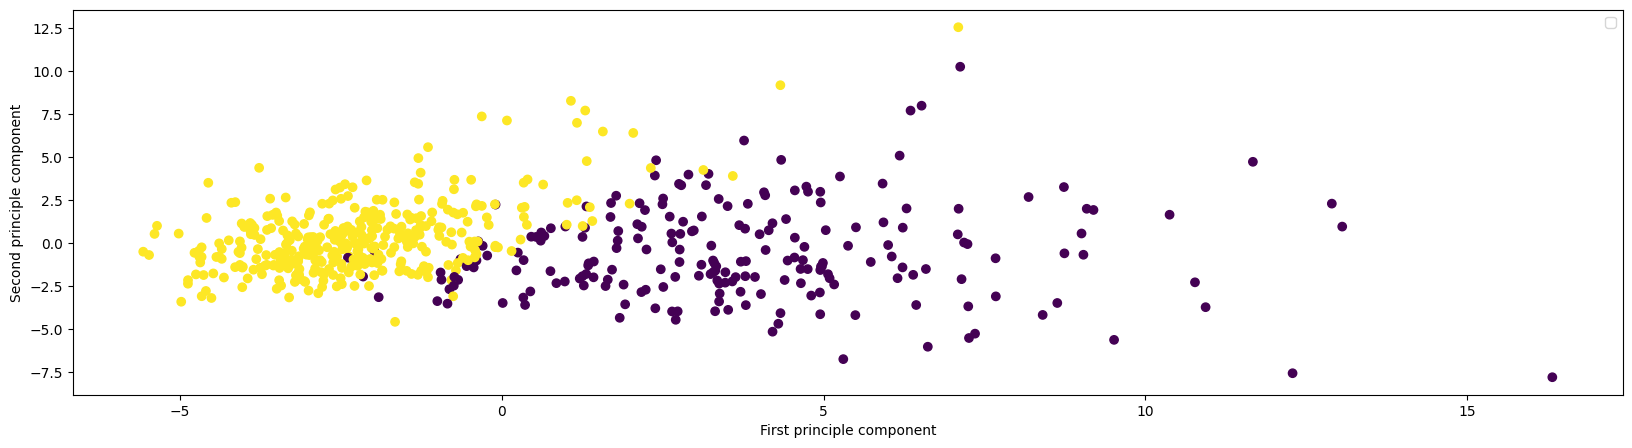

In [18]:
plt.figure(figsize=(20, 5))

plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'])
# sns.scatterplot(x_pca)
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.legend()
plt.show()